# Exploratory analysis

Author: Alan Lorenzetti    
Date: 01/06/2025    

This script will take a dds DESeq2 object and perform a exploratory analysis: PCA, sample distances, and genes of interest. 

## Setting up

In [1]:
# loading libraries
library(DESeq2)
library(ggplot2)
library(ComplexHeatmap)
library(ggthemes)
library(circlize)
library(tidyverse)
library(limma)
library(ggpubr)

Loading required package: S4Vectors



Loading required package: stats4



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min





Attaching package: ‘S4Vectors’




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges



Loading required package: GenomicRanges



Loading required package: GenomeInfoDb



Loading required package: SummarizedExperiment



Loading required package: MatrixGenerics



Loading required package: matrixStats




Attaching package: ‘MatrixGenerics’




The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: Biobase



Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.





Attaching package: ‘Biobase’




The following object is masked from ‘package:MatrixGenerics’:

    rowMedians




The following objects are masked from ‘package:matrixStats’:

    anyMissing, rowMedians




Loading required package: grid



ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors::second()
✖ lubridate::second<-() masks S4Vectors::second<-()
✖ dplyr::slice()        masks IRanges::slice()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘limma’




The following object is masked from ‘package:DESeq2’:

    plotMA




The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
if(!dir.exists("../_m")){dir.create("../_m")}
setwd("../_m")

## Getting started

In [3]:
# loading dds object
load("../../_m/Mature_organoids_all_comparison_design1_deseq2/gene_dds.Rdata")

In [4]:
# checking dataset
dds

class: DESeqDataSet 
dim: 28228 22 
metadata(1): version
assays(4): counts mu H cooks
rownames(28228): ENSG00000238009.6 ENSG00000241860.7 ...
  ENSG00000275405.1 ENSG00000275869.1
rowData names(56): Length gencodeID ... deviance maxCooks
colnames(22): 12N 13N ... 53R 9
colData names(72): SAMPLE_ID basic_statistics ... SAMPLE_ID.y
  sizeFactor

In [5]:
# check design
design(dds)

~Differentiation_cohort + Day_of_Maturation + RIN + Kit + Disease_Status

## PCA plot (raw)

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

# transforming normalized data
rld = log10(counts(dds, normalized=TRUE) + 1)

# Select top n most variable genes
n_most = 500
rv = rowVars(rld)
select = order(rv, decreasing=TRUE)[1:n_most]
rld = rld[select,]

# Run PCA
pca = prcomp(t(rld))
percentVar = round(100 * pca$sdev^2/sum(pca$sdev^2))

# Create plotting data (now including PC3)
pcaData = tibble(
    PC1 = pca$x[,1],
    PC2 = pca$x[,2],
    PC3 = pca$x[,3],
    Disease_Status = colData(dds)$Disease_Status,
    Differentiation_cohort = colData(dds)$Differentiation_cohort,
    Day_of_Maturation = colData(dds)$Day_of_Maturation,
    Kit = colData(dds)$Kit,
    Individual = colData(dds)$individual,
    Cell_line = colData(dds)$Cell_line
)

In [7]:
# PCA Plot section
options(repr.plot.width = 10, repr.plot.height = 8)

# Save PDF
pdf("pca_plot.pdf", width=10, height=8)
ggplot(pcaData, aes(PC1, PC2, color = Disease_Status, shape = Day_of_Maturation)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_bw() +
  scale_color_manual(values = c("healthy" = "#666666", "patient" = "#ff9f55"))
dev.off()

# Save TIFF
ggsave("pca_plot.tiff", 
       ggplot(pcaData, aes(PC1, PC2, color = Disease_Status, shape = Day_of_Maturation)) +
         geom_point(size=3) +
         xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
         ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
         theme_bw() +
  scale_color_manual(values = c("healthy" = "#666666", "patient" = "#ff9f55")),
       width=10, height=8, dpi=600)

pdf 
  2

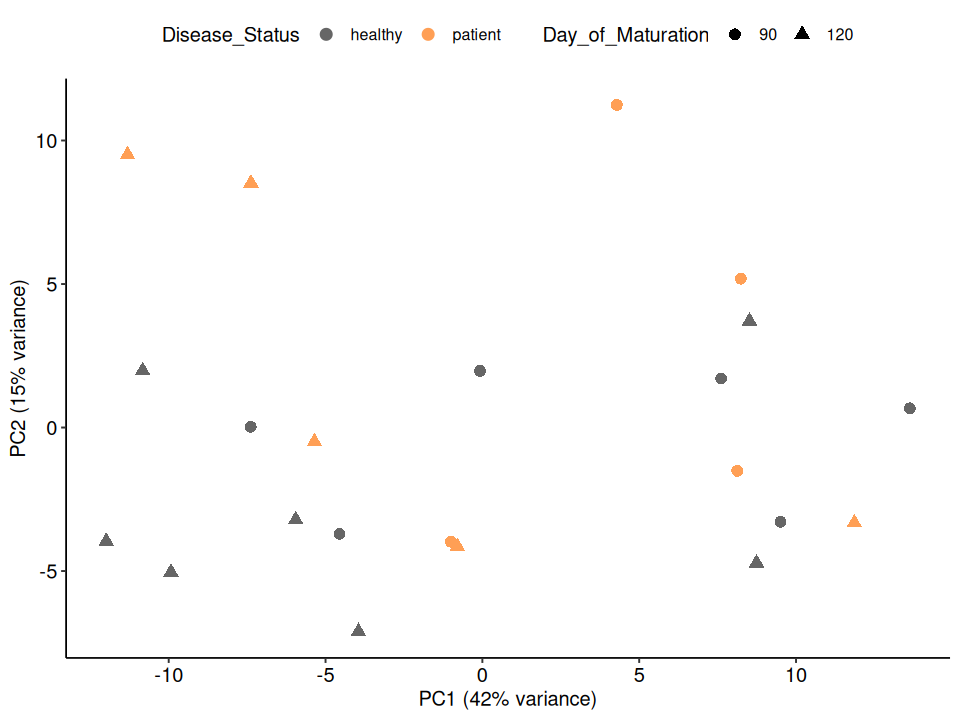

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
pca_dis = ggplot(pcaData, aes(PC1, PC2, color = Disease_Status, shape = Day_of_Maturation)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_pubr() +
  scale_color_manual(values = c("healthy" = "#666666", "patient" = "#ff9f55"))
pca_dis

In [9]:
pca_dc = ggplot(pcaData, aes(PC1, PC2, color = Differentiation_cohort)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_pubr() +
  scale_color_tableau(labels = c("A" = "A",
                                 "B" = "B",
                                 "C" = "C",
                                 "Female_organoids" = "Female_VFOs")) +
    guides(colour = guide_legend(title.position="top", title.hjust = 0.5))

pca_kit = ggplot(pcaData, aes(PC1, PC2, color = Kit)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_pubr() +
  scale_color_tableau() +
    guides(colour = guide_legend(title.position="top", title.hjust = 0.5))

pca_day = ggplot(pcaData, aes(PC1, PC2, color = Day_of_Maturation)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_pubr() +
  scale_color_tableau() +
    guides(colour = guide_legend(title.position="top", title.hjust = 0.5))

pca_ind = ggplot(pcaData, aes(PC1, PC2, color = Individual)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_pubr() +
  scale_color_tableau() +
    guides(colour = guide_legend(title.position="top", title.hjust = 0.5))

pca_cl = ggplot(pcaData, aes(PC1, PC2, color = Cell_line)) +
  geom_point(size=3) +
  xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
  ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
  theme_pubr() +
  scale_color_tableau() +
    guides(colour = guide_legend(title.position="top", title.hjust = 0.5))

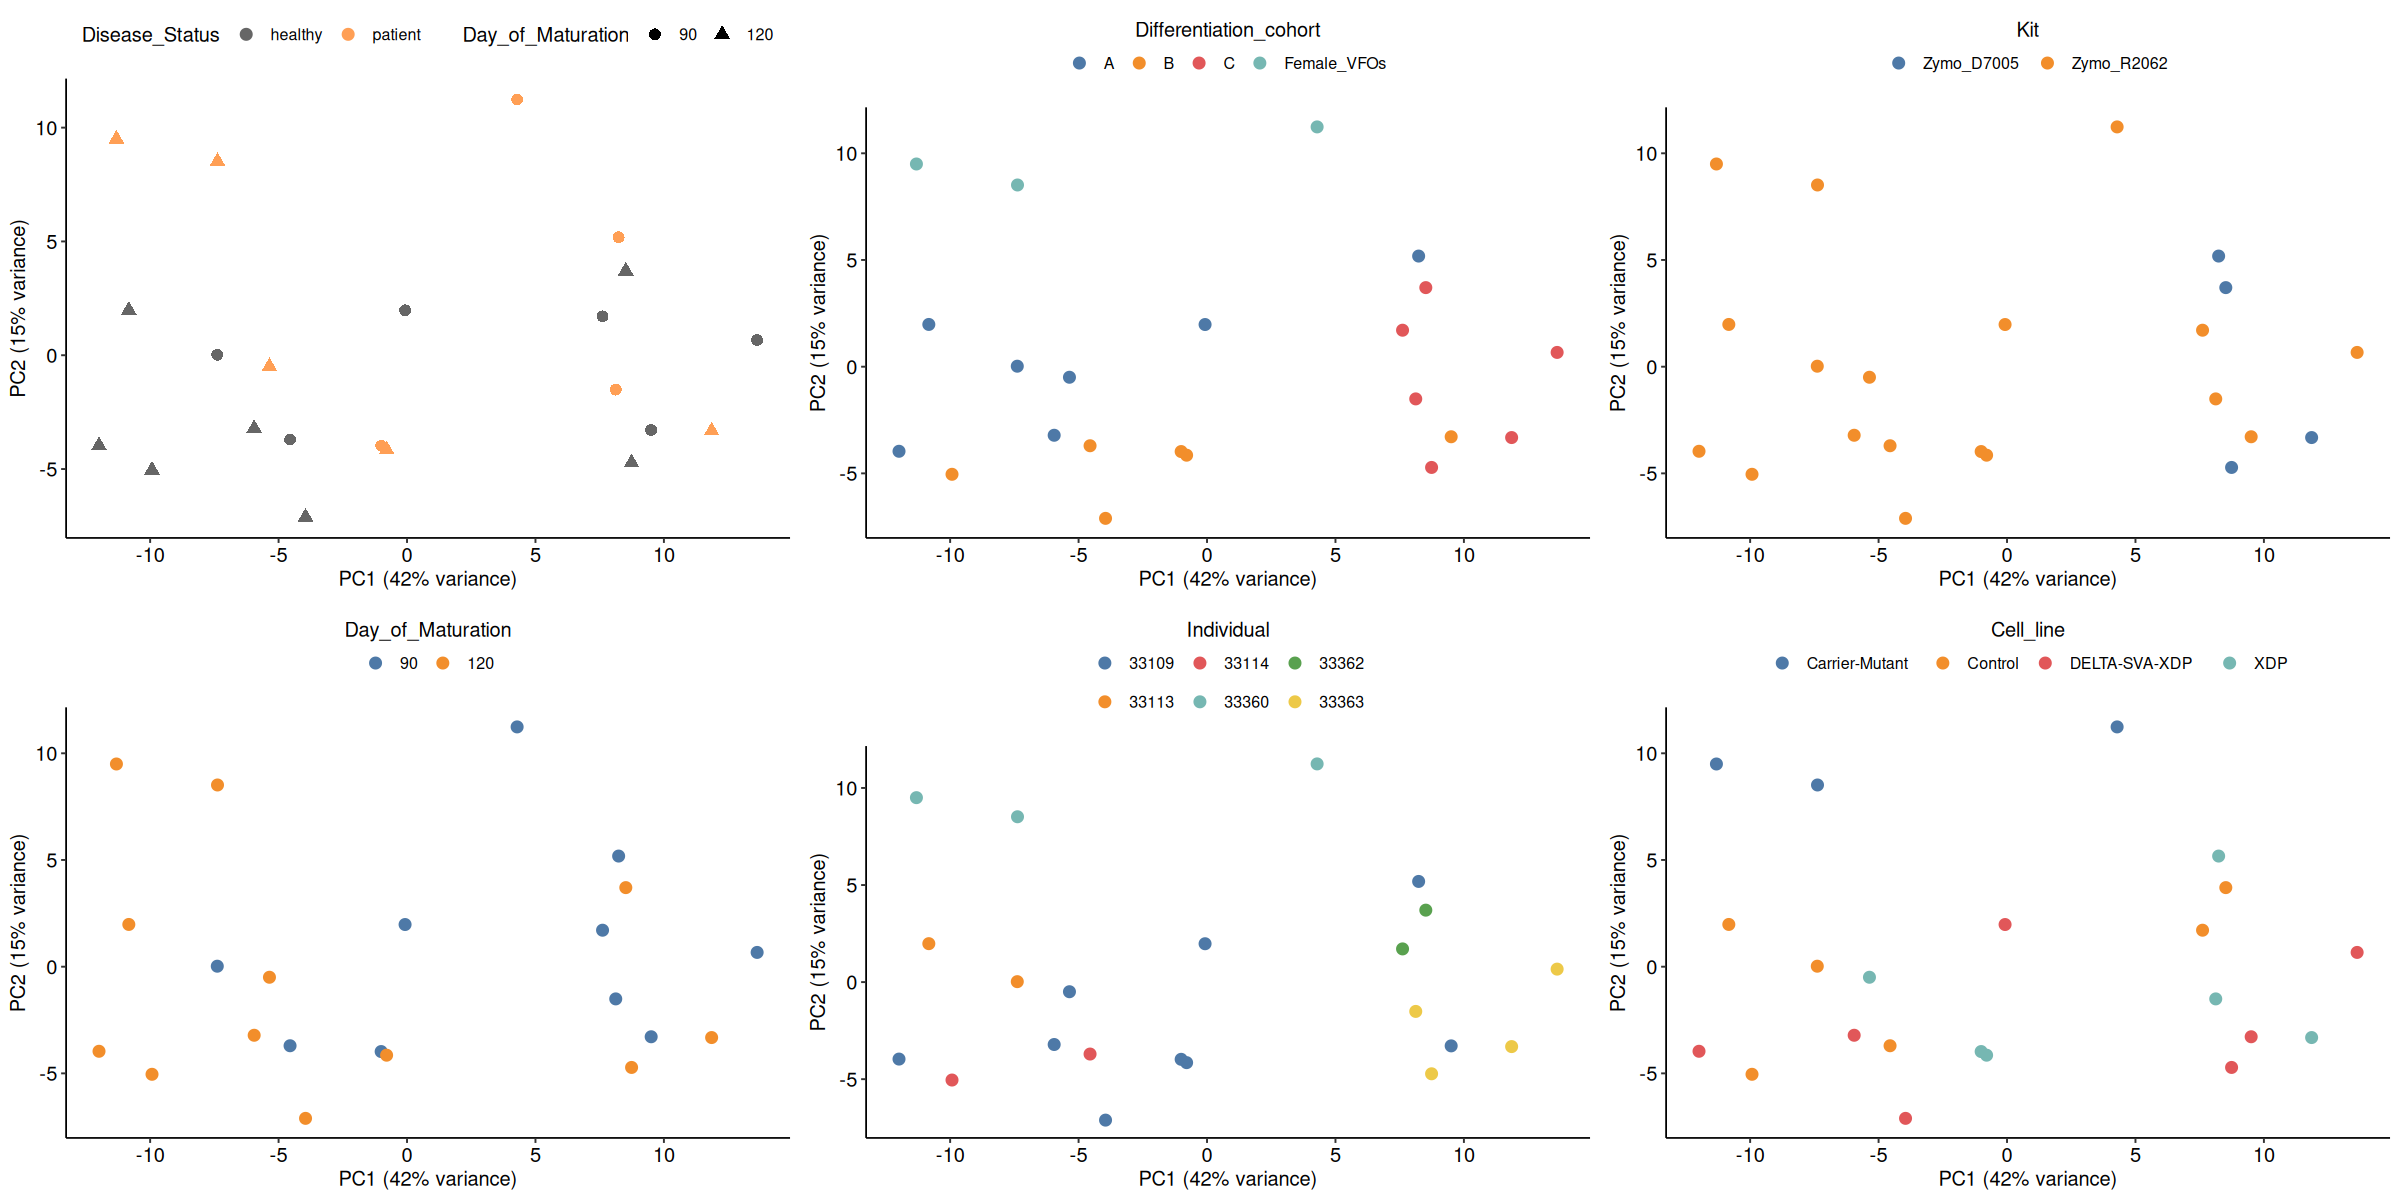

In [10]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggarrange(plotlist = list(pca_dis, pca_dc, pca_kit,
                          pca_day, pca_ind, pca_cl))

## PCA plot (batch-corrected data)

In [11]:
# Get normalized counts and correct for unwanted variation
log_counts = log10(counts(dds, normalized=TRUE) + 1)

# Ensure 'Day_of_Maturation' is a factor
colData(dds)$Day_of_Maturation = as.factor(colData(dds)$Day_of_Maturation)

# Create a design matrix for the covariates
covariate_matrix = model.matrix(~ colData(dds)$RIN + colData(dds)$Day_of_Maturation)

# Remove the intercept column to avoid multicollinearity
covariate_matrix = covariate_matrix[, -1]

corrected_counts = removeBatchEffect(log_counts,
                                     batch=colData(dds)$Differentiation_cohort,
                                     batch2=colData(dds)$Kit,
                                     covariates=covariate_matrix)

# # alternatively don't use Day_of_Maturation to visualize
# corrected_counts = removeBatchEffect(log_counts,
#                                    batch=colData(dds)$Differentiation_cohort,
#                                    batch2=colData(dds)$Kit,
#                                    covariates=colData(dds)$RIN)

# # Select top n most variable genes
# n_most = 500
# rv = rowVars(corrected_counts)
# select = order(rv, decreasing=TRUE)[1:n_most]
# corrected_counts = corrected_counts[select,]

# Run PCA
pca = prcomp(t(corrected_counts))
percentVar = round(100 * pca$sdev^2/sum(pca$sdev^2))

# Create plotting data (now including PC3)
pcaData = data.frame(
    PC1 = pca$x[,1],
    PC2 = pca$x[,2],
    PC3 = pca$x[,3],
    Disease_Status = colData(dds)$Disease_Status,
    Day_of_Maturation = colData(dds)$Day_of_Maturation
)

# Plot PC1 vs PC2
p12 = ggplot(pcaData, aes(PC1, PC2, color = Disease_Status)) +
    geom_point(size=3) +
    xlab(paste0("PC1 (", percentVar[1], "% variance)")) +
    ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
    theme_pubr() +
    scale_color_manual(values = c("healthy" = "#666666", "patient" = "#ff9f55"),
                       labels = c("healthy" = "Healthy", "patient" = "Patient")) +
    guides(colour = guide_legend(title.position="top", title.hjust = 0.5))

# Plot PC2 vs PC3
p23 = ggplot(pcaData, aes(PC3, PC2, color = Disease_Status)) +
    geom_point(size=3) +
    xlab(paste0("PC3 (", percentVar[1], "% variance)")) +
    ylab(paste0("PC2 (", percentVar[2], "% variance)")) +
    theme_pubr() +
    scale_color_manual(values = c("healthy" = "#666666", "patient" = "#ff9f55"),
                       labels = c("healthy" = "Healthy", "patient" = "Patient"))

# Arrange plots side by side
combined_plot = ggarrange(p12, p23, ncol=2, common.legend=TRUE)

# Save plots
ggsave("pca_plot_corrected_PC12.pdf", p12, width=10, height=8)
ggsave("pca_plot_corrected_PC23.pdf", p23, width=10, height=8)
ggsave("pca_plot_corrected_combined.pdf", combined_plot, width=16, height=8)

# Save TIFF versions
ggsave("pca_plot_corrected_PC12.tiff", p12, width=10, height=8, dpi=600)
ggsave("pca_plot_corrected_PC23.tiff", p23, width=10, height=8, dpi=600)
ggsave("pca_plot_corrected_combined.tiff", combined_plot, width=16, height=8, dpi=600)

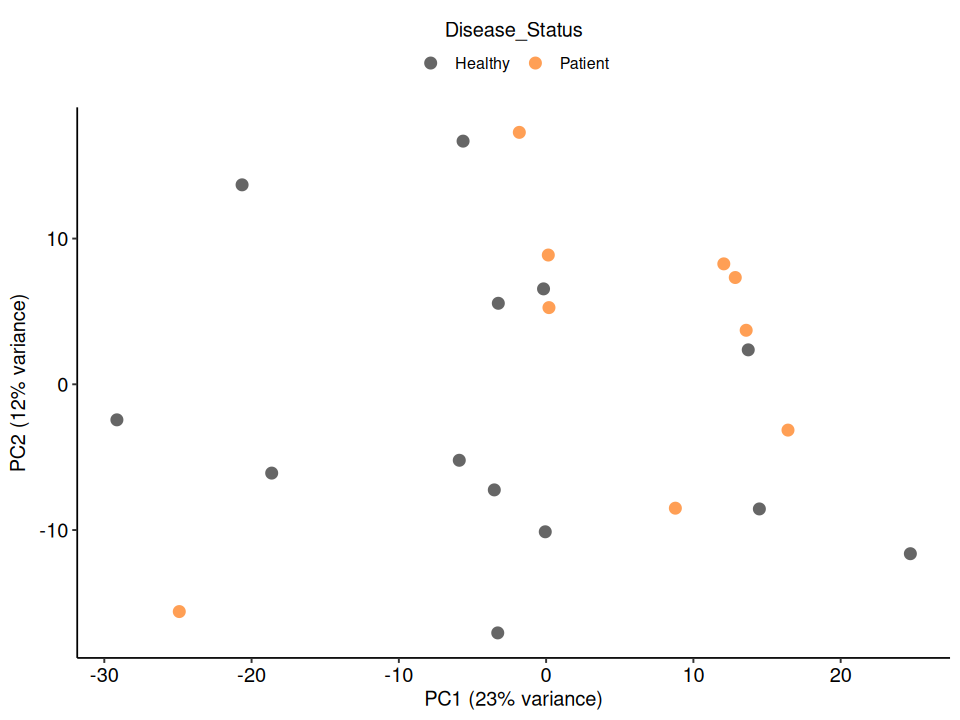

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Display plot
p12

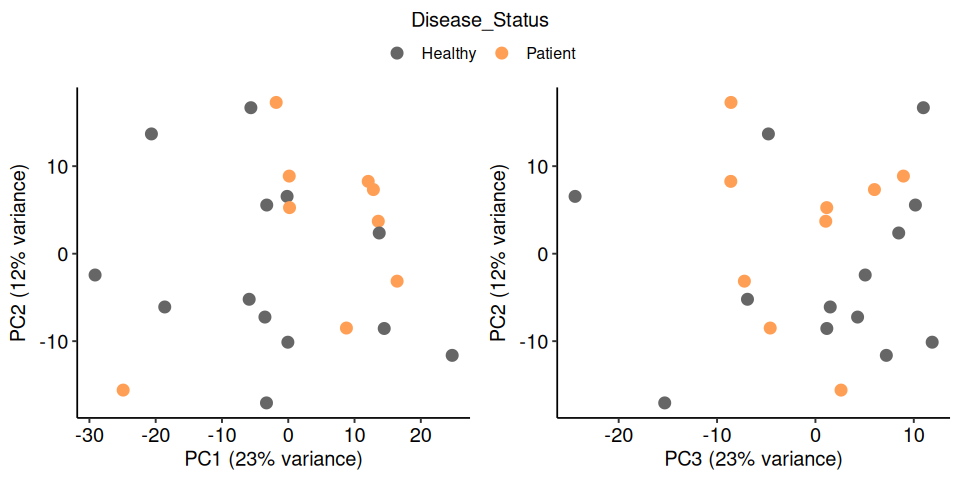

In [13]:
options(repr.plot.width = 8, repr.plot.height = 4)

# Display combined plot
combined_plot

## Plot for supplemental figure

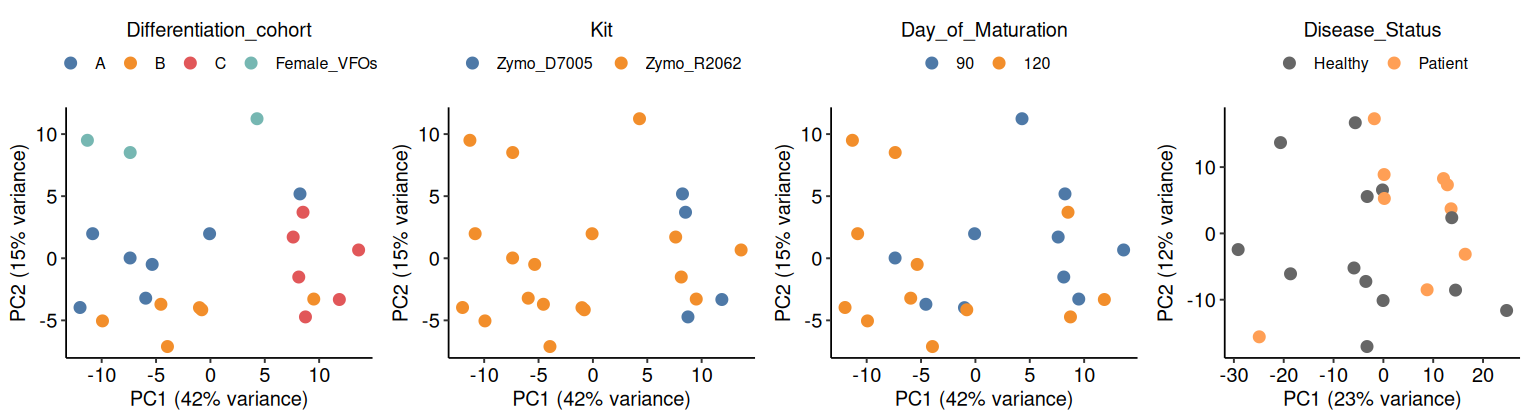

In [14]:
options(repr.plot.width = 12.75, repr.plot.height = 3.5)
pca_supp = ggarrange(plotlist = list(pca_dc, pca_kit, pca_day, p12),
                     nrow = 1)

ggsave("pca_plots_supp_figure.pdf", pca_supp, width=12.75, height=3.5, dpi=600)
ggsave("pca_plots_supp_figure.tiff", pca_supp, width=12.75, height=3.5, dpi=600)
pca_supp

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
pca_supp_sq = ggarrange(plotlist = list(pca_dc, pca_kit, pca_day, p12),
                        nrow = 2, ncol = 2)

ggsave("pca_plots_supp_figure_sq.pdf", pca_supp_sq, width=7, height=7, dpi=600)
ggsave("pca_plots_supp_figure_sq.tiff", pca_supp_sq, width=7, height=7, dpi=600)
pca_supp_sq

In [ ]:
options(repr.plot.width = 3.5, repr.plot.height = 12.75)
pca_supp_col = ggarrange(plotlist = list(pca_dc, pca_kit, pca_day, p12),
                         ncol = 1)

ggsave("pca_plots_supp_figure_col.pdf", pca_supp_col, width=3.5, height=12.75, dpi=600)
ggsave("pca_plots_supp_figure_col.tiff", pca_supp_col, width=3.5, height=12.75, dpi=600)
pca_supp_col

## MDS (batch-corrected data)

In [17]:
# Compute the Pearson correlation matrix between columns
cor_matrix = cor(corrected_counts, method = "pearson")

# Convert the correlation matrix to a distance matrix
# Pearson distance is defined as 1 - Pearson correlation
dist_matrix = as.dist(1 - cor_matrix)

# Perform classical multidimensional scaling (MDS)
mds = cmdscale(dist_matrix, k = 2)

# Calculate the percentage of variance explained by the first two dimensions
eig_values = cmdscale(dist_matrix, k = 2, eig = TRUE)$eig
percentVar_mds = round(100 * eig_values[1:2] / sum(eig_values))

# Create plotting data for MDS
mdsData = data.frame(
    MDS1 = mds[,1],
    MDS2 = mds[,2],
    Disease_Status = colData(dds)$Disease_Status,
    Day_of_Maturation = colData(dds)$Day_of_Maturation
)

# Create MDS plot
mds_plot = ggplot(mdsData, aes(MDS1, MDS2, color = Disease_Status, shape = Day_of_Maturation)) +
    geom_point(size=3) +
    xlab(paste0("MDS1: ", percentVar_mds[1], "% variance")) +
    ylab(paste0("MDS2: ", percentVar_mds[2], "% variance")) +
    theme_pubr() +
    scale_color_manual(values = c("healthy" = "#ff9f55", "patient" = "#666666"))

# Save plots
ggsave("mds_plot_corrected.pdf", mds_plot, width=10, height=8)
ggsave("mds_plot_corrected.tiff", mds_plot, width=10, height=8, dpi=600)

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)
# Display plot
mds_plot

## Euclidean distance between samples (raw)

In [19]:
rld = rlog(dds, blind = TRUE)

# Sample distances
sampleDists = dist(t(assay(rld)))
sampleDistMatrix = as.matrix(sampleDists)

# Create annotation for samples
annotation_col = data.frame(
  Disease_Status = colData(rld)$Disease_Status,
  Day_of_Maturation = colData(rld)$Day_of_Maturation,
  row.names = colnames(rld)
)

In [20]:
# Save PDF
pdf("sample_distances_heatmap.pdf", width=10, height=8)
Heatmap(sampleDistMatrix,
        name = "Distance",
        column_title = "Sample Distances",
        clustering_distance_rows = sampleDists,
        clustering_distance_columns = sampleDists,
        col = circlize::colorRamp2(c(min(sampleDistMatrix), max(sampleDistMatrix)), 
                        c("#E15759", "white")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE)
dev.off()

# Save TIFF
tiff("sample_distances_heatmap.tiff", width=10*600, height=8*600, res=600)
Heatmap(sampleDistMatrix,
        name = "Distance",
        column_title = "Sample Distances",
        clustering_distance_rows = sampleDists,
        clustering_distance_columns = sampleDists,
        col = circlize::colorRamp2(c(min(sampleDistMatrix), max(sampleDistMatrix)), 
                        c("#E15759", "white")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE)
dev.off()

pdf 
  2

pdf 
  2

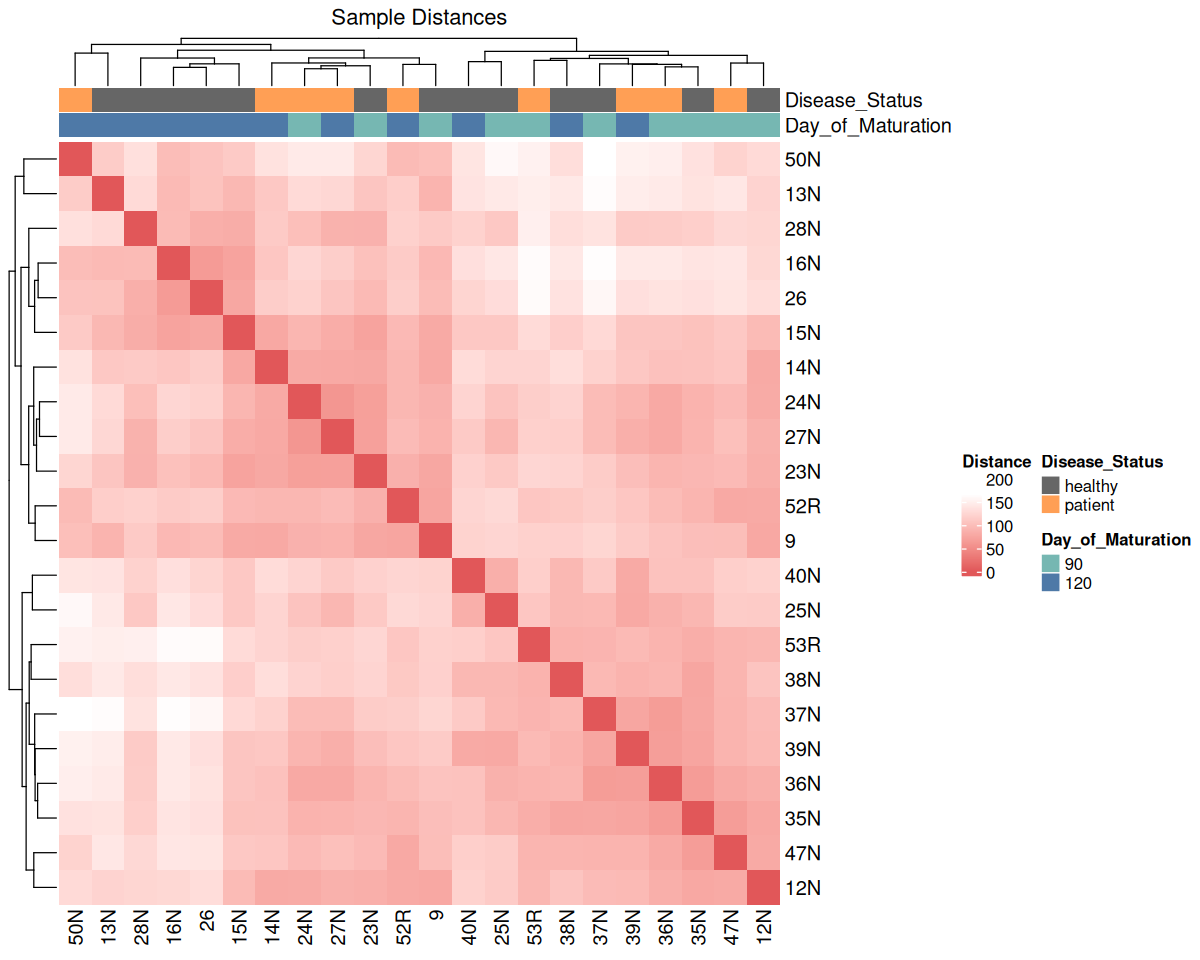

In [21]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Plot distance heatmap using ComplexHeatmap
Heatmap(sampleDistMatrix,
        name = "Distance",
        column_title = "Sample Distances",
        clustering_distance_rows = sampleDists,
        clustering_distance_columns = sampleDists,
        col = circlize::colorRamp2(c(min(sampleDistMatrix), max(sampleDistMatrix)), 
                        c("#E15759", "white")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE)

## Top 40 most variable genes (raw)

In [22]:
# Get top 40 most variable genes
rld_copy = rld
rownames(rld_copy) = rowData(rld)$Symbol
topVarGenes = head(order(rowVars(assay(rld_copy)), decreasing=TRUE), 40)
mat = assay(rld_copy)[topVarGenes, ]

# Calculate z-scores
mat_zscore = t(scale(t(mat)))

# Find max absolute value for symmetrical scale
max_abs = max(abs(mat_zscore))

In [23]:
# Save PDF
pdf("top40_variable_genes_heatmap.pdf", width=10, height=8)
Heatmap(mat_zscore,
        name = "Z-Score",
        column_title = "Top 40 Most Variable Genes",
        col = circlize::colorRamp2(c(-max_abs, 0, max_abs), c("#4e79a7", "white", "#d62728")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,
        cluster_columns = TRUE)
dev.off()

# Save TIFF
tiff("top40_variable_genes_heatmap.tiff", width=10*600, height=8*600, res=600)
Heatmap(mat_zscore,
        name = "Z-Score",
        column_title = "Top 40 Most Variable Genes",
        col = circlize::colorRamp2(c(-max_abs, 0, max_abs), c("#4e79a7", "white", "#d62728")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,
        cluster_columns = TRUE)
dev.off()

pdf 
  2

pdf 
  2

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Plot top variable genes heatmap
Heatmap(mat_zscore,
        name = "Z-Score",
        column_title = "Top 40 Most Variable Genes",
        col = circlize::colorRamp2(c(-max_abs, 0, max_abs), c("#4e79a7", "white", "#d62728")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,
        cluster_columns = TRUE)

## 80 top/bottom DEGs (at nominal p < 0.05) (raw)

In [25]:
# reading differentially expressed genes at the nominal p < 0.05
res = read_tsv("../../_m//Mature_organoids_all_comparison_design1_deseq2/gene_deseq2_results.tsv") %>%
    filter(pvalue < 0.05) %>%
    arrange(log2FoldChange)

bottom = res %>% head(40) %>% pull(ROW_INDEX)
top = res %>% tail(40) %>% pull(ROW_INDEX)
bottop = c(bottom, top)

# Get top most variable genes
rld_copy = rld
rld_copy = rld_copy[rownames(rld_copy) %in% bottop,]
rownames(rld_copy) = rowData(rld_copy)$Symbol
mat = assay(rld_copy)

# Calculate z-scores
mat_zscore = t(scale(t(mat)))

# Find max absolute value for symmetrical scale
max_abs = max(abs(mat_zscore))

Rows: 28228 Columns: 63


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): ROW_INDEX, gencodeID, ensemblID, gene_type, Symbol, Class, gencodeTx
dbl (52): baseMean.x, log2FoldChange, lfcSE, stat, pvalue, padj, Length, Ent...
lgl  (4): allZero, dispOutlier, betaConv, maxCooks



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
# Save PDF
pdf("degs_heatmap.pdf", width=10, height=16)
Heatmap(mat_zscore,
        name = "Z-Score",
        column_title = "Top and bottom 80 DEGs at p < 0.05",
        col = colorRamp2(c(-max_abs, 0, max_abs), c("#4e79a7", "white", "#d62728")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,
        cluster_columns = TRUE)
dev.off()

# Save TIFF
tiff("degs_heatmap.tiff", width=10*600, height=16*600, res=600)
Heatmap(mat_zscore,
        name = "Z-Score",
        column_title = "Top and bottom 80 DEGs at p < 0.05",
        col = colorRamp2(c(-max_abs, 0, max_abs), c("#4e79a7", "white", "#d62728")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,
        cluster_columns = TRUE)
dev.off()

pdf 
  2

pdf 
  2

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 16)
# Plot top variable genes heatmap
Heatmap(mat_zscore,
        name = "Z-Score",
        column_title = "Top and bottom 80 DEGs at p < 0.05",
        col = colorRamp2(c(-max_abs, 0, max_abs), c("#4e79a7", "white", "#d62728")),
        top_annotation = HeatmapAnnotation(df = annotation_col,
                                           col = list(Disease_Status = c("healthy" = "#666666",
                                                                         "patient" = "#ff9f55"),
                                                      Day_of_Maturation = c("90" =  "#76B7B2",
                                                                            "120" = "#4E79A7"))),
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,
        cluster_columns = TRUE)

## Session Info

In [28]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libblas.so.3.12.0 
LAPACK: /usr/lib/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: EST
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggpubr_0.6.0                limma_3.62.1               
 [3] lubridate_1.9.4             forcats_1.0.0              
 [5] stringr_1.5.1               dplyr_1.1.4                
 [7] purrr_1.0.2                 readr_2.1.5                
 [9] tidyr_1.3